# Playing with convolutions and pools

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

Using TensorFlow backend.


## Convolutions: it's all about filters

Let's build a function for showing an image without any modification:

In [0]:
# function for showing an image
def show_image(image):

  img = load_img(image,color_mode='grayscale')
  img_array = img_to_array(img)
  i = img_array.flatten().reshape(img_array.shape[0], img_array.shape[1])

  plt.figure(figsize=(8,8))
  plt.grid(False)
  plt.gray()
  plt.axis('on')
  plt.imshow(i)
  plt.show()

  print('Shape of the image:',i.shape)
  print('')

And now let's build a function that shows the output image after applying a filter:

In [0]:
def apply_filter(image, filter):

  img = load_img(image,color_mode='grayscale')
  img_array = img_to_array(img)
  i = img_array.flatten().reshape(img_array.shape[0], img_array.shape[1])

  i_transformed = np.copy(i)
  size_x = i_transformed.shape[0]
  size_y = i_transformed.shape[1]

  if np.sum(filter) == 0:
    weight = 1.
  else:
    weight = 1 / np.sum(filter)

  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])
        convolution = convolution + (i[x-1, y+1] * filter[0][2])
        convolution = convolution + (i[x, y-1] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x, y+1] * filter[1][2])
        convolution = convolution + (i[x+1, y-1] * filter[2][0])
        convolution = convolution + (i[x+1, y] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution

  plt.figure(figsize=(8,8))
  plt.gray()
  plt.grid(False)
  plt.imshow(i_transformed)
  plt.axis('on')
  plt.show()

Let's define some filters 

In [0]:
# naive filter
filter_naive = \
           [[+0.0, +0.0, +0.0], 
            [+0.0, +1.0, +0.0], 
            [+0.0, +0.0, +0.0]]

# filter for detecting vertical lines
filter_vertical = \
           [[+1.0, +0.0, -1.0], 
            [+1.0, +0.0, -1.0], 
            [+1.0, +0.0, -1.0]]

# filter for detecting horizontal lines
filter_horizontal = \
           [[+1.0, +1.0, +1.0], 
            [+0.0, +0.0, +0.0], 
            [-1.0, -1.0, -1.0]]


# filter for detecting obliquous lines
filter_obliquous = \
           [[-1.0, -1.0, +2.0], 
            [-1.0, +2.0, -1.0], 
            [+2.0, -1.0, -1.0]]

# filter for getting blurry images
filter_blur = \
           [[+1.0, +1.0, +1.0], 
            [+1.0, +1.0, +1.0], 
            [+1.0, +1.0, +1.0]]

# filter for getting sharper edges
filter_edges = \
           [[+1.0, +1.0, +1.0], 
            [+1.0, -7.0, +1.0], 
            [+1.0, +1.0, +1.0]]

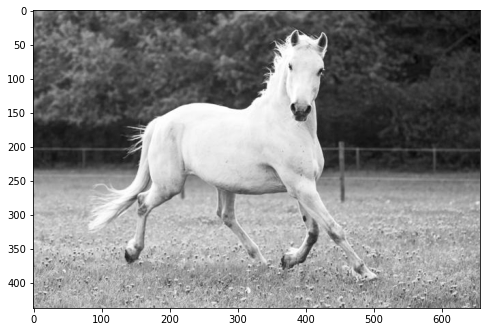

Shape of the image: (437, 656)



In [0]:
show_image('horse.jpg')

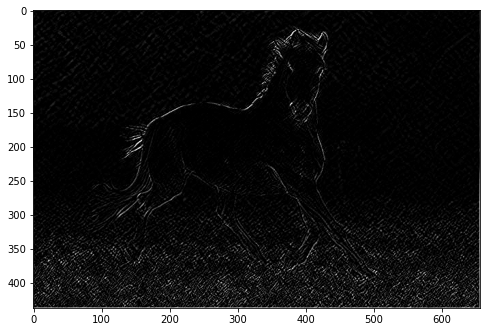

In [0]:
apply_filter('horse.jpg', filter_obliquous)

## Pools

Let's define a function that applies a filter and then gets the image pooled:

In [0]:
def apply_filter_pool(image, filter):

  img_pre = load_img(image,color_mode='grayscale')
  x_img_pre = img_pre.size[0]
  y_img_pre = img_pre.size[1]
  img = load_img(image,color_mode='grayscale', target_size=(int(np.ceil(y_img_pre)//2*2),int(np.ceil(x_img_pre)//2*2)))
  img_array = img_to_array(img)
  i = img_array.flatten().reshape(img_array.shape[0], img_array.shape[1])

  i_transformed = np.copy(i)
  size_x = i_transformed.shape[0]
  size_y = i_transformed.shape[1]

  if np.sum(filter) == 0:
    weight = 1.
  else:
    weight = 1 / np.sum(filter)

  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])
        convolution = convolution + (i[x-1, y+1] * filter[0][2])
        convolution = convolution + (i[x, y-1] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x, y+1] * filter[1][2])
        convolution = convolution + (i[x+1, y-1] * filter[2][0])
        convolution = convolution + (i[x+1, y] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution

  new_x = int(size_x/2)
  new_y = int(size_y/2)
  newImage = np.zeros((new_x, new_y))
  for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
      pixels = []
      pixels.append(i_transformed[x, y])
      pixels.append(i_transformed[x+1, y])
      pixels.append(i_transformed[x, y+1])
      pixels.append(i_transformed[x+1, y+1])
      newImage[int(x/2),int(y/2)] = max(pixels)  # try with average

  plt.grid(False)
  plt.imshow(newImage)
  plt.gray()
  plt.axis('on')
  plt.show()


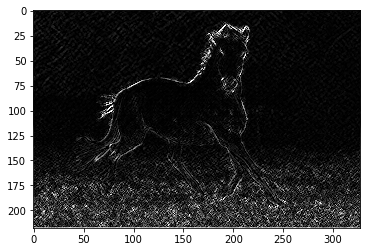

In [20]:
apply_filter_pool('horse.jpg', filter_obliquous)